In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import sys


sys.path.append('/opt/anaconda3/envs/kf_bf/Kalman-and-Bayesian-Filters-in-Python/kf_book/')
# Read a CSV file
df = pd.read_csv('./GDP_data.csv')
#df.set_index('year', inplace = False)
print(df.head())  # Display the first few rows

   year  GDP_FP  GDP_LP
0  1950     108       5
1  1951     110       6
2  1952     111       7
3  1953     114       7
4  1954     120       8


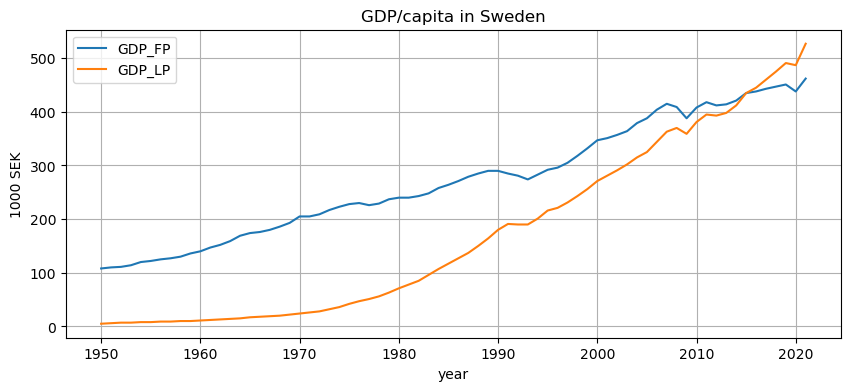

In [17]:
# plt.figure();
#a = df.index()
#dff = pd.DataFrame(df, index = 'year', inplace = True)
#dff.set_index('year', inplace = True)
df.set_index('year', inplace=True)
df.plot()
plt.ylabel('1000 SEK')
plt.xlabel('year')
plt.ylabel('1000 SEK')
plt.title('GDP/capita in Sweden')
plt.grid()

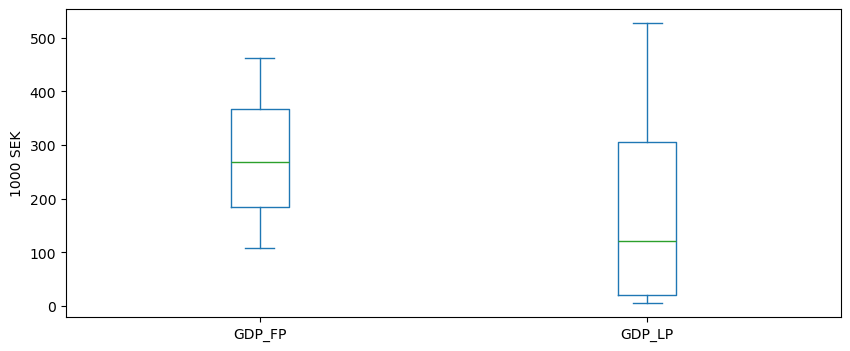

In [10]:
df.plot.box();
plt.ylabel('1000 SEK');


In [11]:
df.reset_index
df


,GDP_FP,GDP_LP
year,,
1950,108,5
1951,110,6
1952,111,7
1953,114,7
1954,120,8
...,...,...
2017,443,460
2018,447,475
2019,451,491


* FP: GDP is adjusted for prices in 2015 
* LP: GDP is adjusted for current prices 

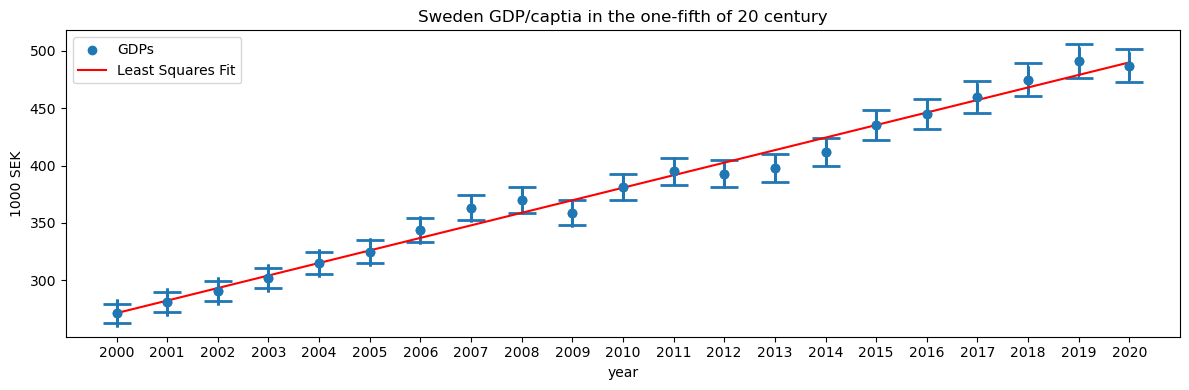

In [12]:
y = df['GDP_LP'][-22:-1].to_list() #read variable in Pandas datafraeme format
x = range(1, len(y)+1) 
tick = df.index[-22:-1]
coefficients = np.polyfit(x, y, 1)  # Fit a first-order polynomial (line)
fit_function = np.poly1d(coefficients) #calculate prediction after fitting a red line

fig, ax = plt.subplots(figsize=(12,4)) #read about matplotlib.pyplot
ax.scatter(x, y, label='GDPs')
yerr = [element * 0.03 for element in y]
ax.errorbar(x, y, fmt='o', xerr=0, yerr=yerr, capthick=2, capsize=10)
ax.plot(x, fit_function(x), color='red', label='Least Squares Fit')
ax.set_xlabel('year')
ax.set_ylabel('1000 SEK')
ax.set_xticks(x, tick)
plt.title('Sweden GDP/captia in the one-fifth of 20 century')
plt.legend();
fig.tight_layout()

In [13]:
import book_plots as bp
def g_h_filter(data, X0, dx, g, h, dt=1., do_print = True):
    x_est = X0
    estimates, predictions = [x_est], []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        predictions.append(x_pred)
        estimates.append(x_est)
        if do_print:
            print('previous estimate: {:.2f}, prediction: {:.2f}, estimate {:.2f}'.format(estimates[-2], x_pred, z))
    return np.array(estimates), np.array(predictions)

estimates, preds = g_h_filter(data=y, X0=270., dx=10., g=6./10, h=2./3, dt=1.)

previous estimate: 270.00, prediction: 280.00, estimate 271.00
previous estimate: 274.60, prediction: 278.60, estimate 281.00
previous estimate: 280.04, prediction: 285.64, estimate 291.00
previous estimate: 288.86, prediction: 298.03, estimate 302.00
previous estimate: 300.41, prediction: 312.23, estimate 315.00
previous estimate: 313.89, prediction: 327.56, estimate 325.00
previous estimate: 326.02, prediction: 337.98, estimate 344.00
previous estimate: 341.59, prediction: 357.56, estimate 363.00
previous estimate: 360.83, prediction: 380.42, estimate 370.00
previous estimate: 374.17, prediction: 386.82, estimate 359.00
previous estimate: 370.13, prediction: 364.23, estimate 381.00
previous estimate: 374.29, prediction: 379.58, estimate 395.00
previous estimate: 388.83, prediction: 404.40, estimate 393.00
previous estimate: 397.56, prediction: 405.53, estimate 398.00
previous estimate: 401.01, prediction: 403.96, estimate 412.00
previous estimate: 408.78, prediction: 417.09, estimate

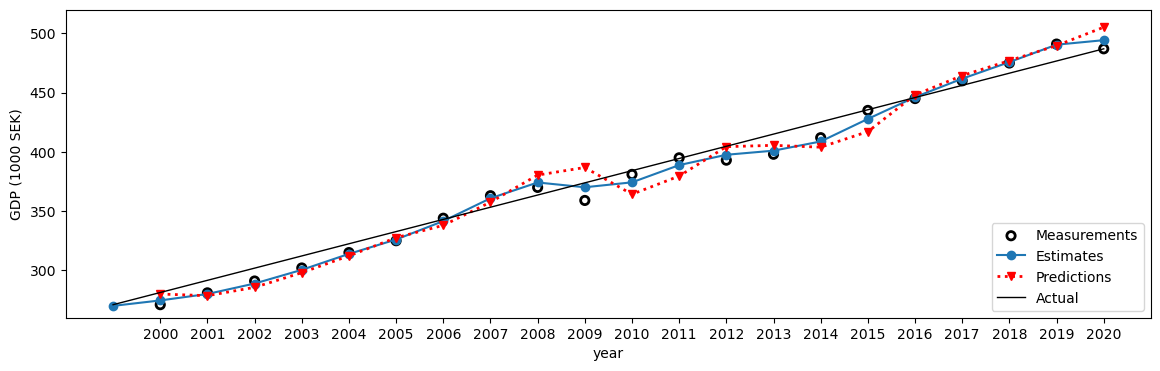

In [14]:
def plot_gh_results(y, estimates, preds, actual, time_step=0):
    n = len(y)
    if time_step > 0:
        rng = range(1, n+1)
    else:
        rng = range(n, n+1)
    xs = range(n+1)
    fig, ax = plt.subplots(figsize=(14,4))
    bp.plot_measurements(range(1, len(y)+1), y, color='k', lines=False)
    bp.plot_filter(xs, estimates, marker='o', label='Estimates')
    bp.plot_track(xs[1:], preds, c='r', marker='v', label='Predictions')
    plt.plot([xs[0], xs[-1]], actual, c='k', lw=1, label='Actual')
    plt.legend(loc=4)
    bp.set_labels(x='year', y='GDP (1000 SEK)')
    ax.set_xticks(x, tick)
    plt.xlim([-1, n+1])
    plt.ylim([260,520])


bp.set_figsize(10)
plot_gh_results(y, estimates, preds, actual=[y[0], y[-1]])